In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import the merge_data.csv file
data = pd.read_csv('merged_data.csv')

# Define the predictors and the classes
predictors = data[['ar', 'lrr', 'srr', 'alr', 'sdr', 'smr']]
classes = data['FailureType']

# Turn classes into binary values following the following rule:
# if FailureType == 'Flexural' then 1 else 0
classes = classes.apply(lambda x: 1 if x == 'Flexure' else 0)


Accuracy:  0.8522727272727273
Confusion Matrix: 
[[12 12]
 [ 1 63]]
ROC AUC:  0.7421875


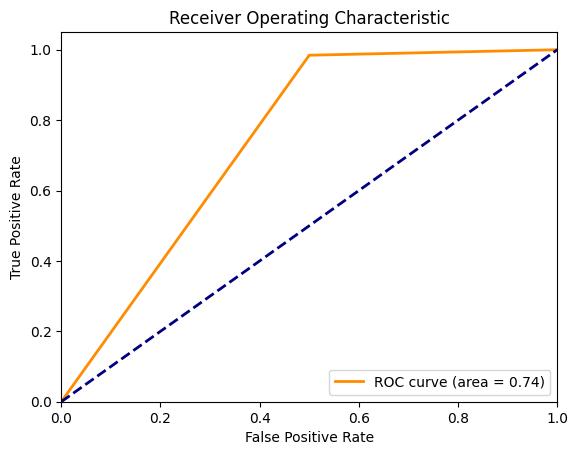

In [23]:
# Do split in training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, classes, test_size=0.3, random_state=0)

# Train a logistic regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# Predict the classes
predictions = logisticRegr.predict(X_test)

# Compute the accuracy
score = logisticRegr.score(X_test, y_test)
print('Accuracy: ', score)

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix: ')
print(confusion_matrix)

# Compute the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
print('ROC AUC: ', roc_auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Save the model
import pickle
filename = 'logistic_regression_model.sav'
pickle.dump(logisticRegr, open(filename, 'wb'))

In [ ]:
# Load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print('Loaded model accuracy: ', result)

# Predict the classes using the loaded model
predictions = loaded_model.predict(X_test)

Loaded model accuracy:  0.8522727272727273


In [36]:
# Create a new vector with 6 values and generate a prediction

# Test the model with a new vector
new_vector = pd.DataFrame(np.array([2.5, 0.2, 0.3, 0.4, 0.5, 0.6]).reshape(1, -1), columns=predictors.columns)
new_prediction = loaded_model.predict(new_vector)
print('New prediction: ', new_prediction)

# Predict probabilities
probabilities = loaded_model.predict_proba(X_test)
print('Probabilities: ', probabilities)


New prediction:  [1]
Probabilities:  [[0.17682196 0.82317804]
 [0.43384351 0.56615649]
 [0.01196396 0.98803604]
 [0.07827887 0.92172113]
 [0.15610796 0.84389204]
 [0.09239448 0.90760552]
 [0.23683553 0.76316447]
 [0.1825314  0.8174686 ]
 [0.36082736 0.63917264]
 [0.66612946 0.33387054]
 [0.12770381 0.87229619]
 [0.01612301 0.98387699]
 [0.06534433 0.93465567]
 [0.10285147 0.89714853]
 [0.01748888 0.98251112]
 [0.00462609 0.99537391]
 [0.43289177 0.56710823]
 [0.02037071 0.97962929]
 [0.15351562 0.84648438]
 [0.07181742 0.92818258]
 [0.73912782 0.26087218]
 [0.0135847  0.9864153 ]
 [0.0039404  0.9960596 ]
 [0.00169434 0.99830566]
 [0.00139309 0.99860691]
 [0.59983562 0.40016438]
 [0.11807647 0.88192353]
 [0.10576418 0.89423582]
 [0.27339772 0.72660228]
 [0.10947342 0.89052658]
 [0.03154195 0.96845805]
 [0.48337988 0.51662012]
 [0.39481373 0.60518627]
 [0.74926549 0.25073451]
 [0.04523325 0.95476675]
 [0.08747945 0.91252055]
 [0.19603282 0.80396718]
 [0.02981254 0.97018746]
 [0.04196459 

In [39]:
# This function takes a new_vector and returns the most likely class and a set of 10 samples according to the probabilities

def predict_with_uncertainty(new_vector, model, n_samples=10):
    # Predict the class
    prediction = model.predict(new_vector)
    # Predict the probabilities
    probabilities = model.predict_proba(new_vector)
    # Generate n_samples samples
    samples = np.random.choice([0, 1], size=(n_samples, 1), p=probabilities[0])
    return prediction, probabilities[0][prediction[0]], samples

new_vector = pd.DataFrame(np.array([1.5, 0.2, 0.3, 0.4, 0.5, 0.6]).reshape(1, -1), columns=predictors.columns)
# Try the function
prediction, probability, samples = predict_with_uncertainty(new_vector, loaded_model)
print('Prediction: ', prediction)
print('Probability of most likely class: ', probability)
print('Samples: ', samples)


Prediction:  [1]
Probability of most likely class:  0.8005806526924075
Samples:  [[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]]


/opt/anaconda3/envs/simcenter/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


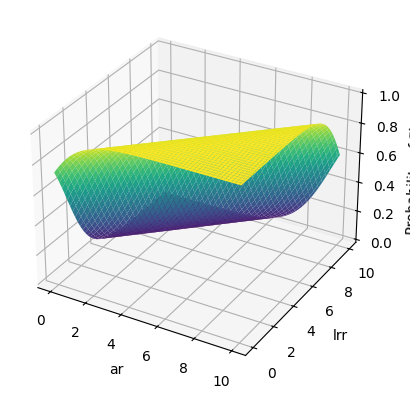

In [42]:
# Create a 3d surface plot using the logistic regression model
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
x, y = np.meshgrid(x, y)
z = loaded_model.predict_proba(np.c_[x.ravel(), y.ravel(), np.zeros(x.ravel().shape), np.zeros(x.ravel().shape), np.zeros(x.ravel().shape), np.zeros(x.ravel().shape)])[:, 1].reshape(x.shape)
ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('ar')
ax.set_ylabel('lrr')
ax.set_zlabel('Probability of Flexure')
plt.show()
